In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl

In [2]:
df=pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price USD
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [3]:
import pandas as pd

df = pd.read_csv("housePrice.csv")

# تبدیل مقادیر رشته ای به اعداد
df["Area"] = df["Area"].str.replace(",", "").astype(float)

# حذف ردیف هایی شامل اعداد خیلی بزرگ
df = df.drop(df[df["Area"] > 450].index)

In [4]:

df = pd.read_csv('housePrice.csv')

# اسم محله مورد نظر
neighborhood_to_keep = 'Shahran'

# فیلتر کردن ردیف‌هایی که شامل اسم محله مورد نظر نیستند
filtered_df = df[df['Address'] == neighborhood_to_keep]

# حذف ردیف‌هایی که شامل اسم محله مورد نظر نیستند
df = df.drop(df[df['Address'] != neighborhood_to_keep].index)

In [5]:
cdf=df[["Area","Room","Address","Price"]]
cdf.head(9)

,Area,Room,Address,Price
0,63,1,Shahran,1850000000
1,60,1,Shahran,1850000000
7,59,1,Shahran,2150000000
22,65,1,Shahran,1880000000
56,72,2,Shahran,2350000000
65,109,2,Shahran,3500000000
77,42,1,Shahran,1760000000
83,42,1,Shahran,1760000000
105,110,2,Shahran,3850000000


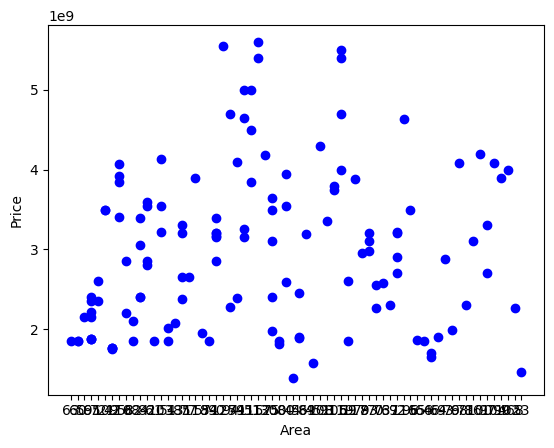

In [6]:
plt.scatter(cdf.Area, cdf.Price, color="blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

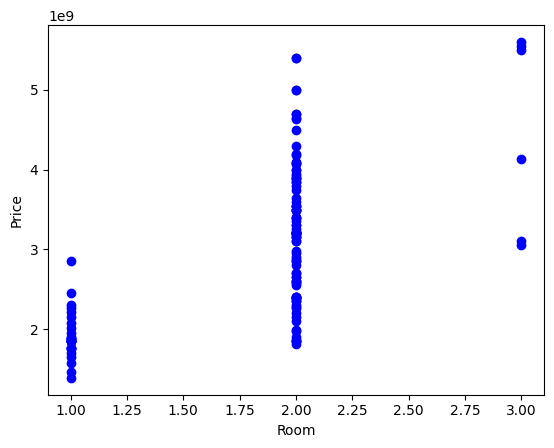

In [7]:
plt.scatter(cdf.Room, cdf.Price, color="blue")
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()

In [8]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

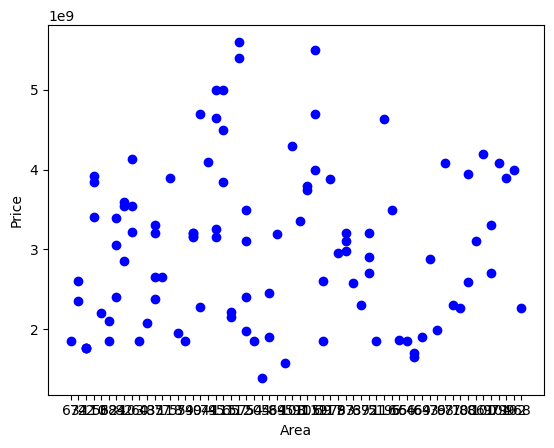

In [9]:
plt.scatter(train.Area, train.Price, color="blue")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[["Area"]])
train_y=np.asanyarray(train[["Price"]])

test_x=np.asanyarray(train[["Area"]])
test_y=np.asanyarray(train[["Price"]])

poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
train_x_poly

array([[1.0000e+00, 6.3000e+01, 3.9690e+03],
       [1.0000e+00, 7.2000e+01, 5.1840e+03],
       [1.0000e+00, 4.2000e+01, 1.7640e+03],
       [1.0000e+00, 4.2000e+01, 1.7640e+03],
       [1.0000e+00, 1.1000e+02, 1.2100e+04],
       [1.0000e+00, 5.8000e+01, 3.3640e+03],
       [1.0000e+00, 6.2000e+01, 3.8440e+03],
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03],
       [1.0000e+00, 1.0300e+02, 1.0609e+04],
       [1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 4.3000e+01, 1.8490e+03],
       [1.0000e+00, 8.5000e+01, 7.2250e+03],
       [1.0000e+00, 7.7000e+01, 5.9290e+03],
       [1.0000e+00, 1.1800e+02, 1.3924e+04],
       [1.0000e+00, 5.7000e+01, 3.2490e+03],
       [1.0000e+00, 5.4000e+01, 2.9160e+03],
       [1.0000e+00, 9.0000e+01, 8.1000e+03],
       [1.0000e+00, 9.0000e+01, 8.1000e+03],
       [1.0000e+00, 9.4000e+01, 8.8360e+03],
       [1.0000e+00, 7.4000e+01, 5.4760e+03],
       [1.0000e+00, 9.5000e+01, 9.0250e+03],
       [1.

In [22]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)

print("Coefficients",clf.coef_)
print("Intercept",clf.intercept_)

Coefficients [[       0.         11165712.89806376   179191.61816932]]
Intercept [8.06229883e+08]


Text(0, 0.5, 'Price')

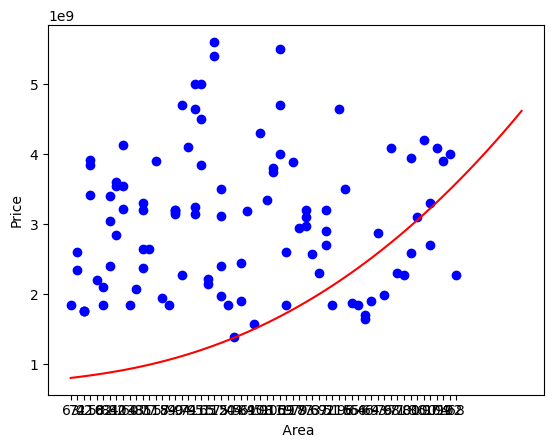

In [36]:
plt.scatter(train.Area, train.Price, color="blue")
XX=np.arange(0.0,70.0,1.0)
yy=clf.intercept_[0]+ clf.coef_[0] [1] * XX + clf.coef_[0] [2] *np.power(XX,2.3)
plt.plot(XX,yy,"-r")
plt.xlabel(" Area")
plt.ylabel("Price")

In [37]:
from sklearn.metrics import r2_score

test_x_poly=poly.fit_transform(test_x)
test_y_=clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of aquares (MSE): %.2f" % np.mean(np.absolute(test_y_-test_y))**2)
print("r2_score: %.2f" % r2_score(test_y,test_y_))

Mean absolute error: 363450608.32
Residual sum of aquares (MSE): 132096344686216864.00
r2_score: 0.74
